In [5]:
import pandas as pd
from src.synthetic_pipeline import *
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df= pd.read_parquet(r'C:\Users\miguel.ortiz\Documents\Doutorado\Synthetic\codes\dados\df_complete_cases.parquet')

In [12]:
df

,CeaWkId,StoreID,ModelID,ItemColorId,ListPrice,CurrentPrice,Cost,Quantity,StockPieces,Week
0,202325,606,1003614,VERDE_CL9,89.99,75.99,24.6767,1,11,2023-06-19
1,202327,606,1003614,VERDE_CL9,89.99,75.99,21.4193,5,16,2023-07-03
2,202328,606,1003614,VERDE_CL9,89.99,75.99,21.4193,4,13,2023-07-10
3,202329,606,1003614,VERDE_CL9,89.99,75.99,21.4693,4,12,2023-07-17
4,202330,606,1003614,VERDE_CL9,89.99,69.99,23.3250,1,12,2023-07-24
...,...,...,...,...,...,...,...,...,...,...
65364,202429,606,9680111,OFF_WHITE,49.99,59.99,21.9097,30,108,2024-07-15
65365,202430,606,9680111,OFF_WHITE,49.99,59.99,21.5430,26,177,2024-07-22
65366,202431,606,9680111,OFF_WHITE,49.99,59.99,21.9280,17,190,2024-07-29
65367,202432,606,9680111,OFF_WHITE,49.99,59.99,21.9217,45,169,2024-08-05


In [7]:
categorical_features = ['ModelID', 'ItemColorId']
numerical_features = ['ListPrice', 'CurrentPrice', 'Cost', 'Quantity', 'StockPieces']

model = SyntheticDataModel()
results, synthetic_data_dict  = model.run(
    df=df,
    weeks_column='Week',
    target_column='Quantity',
    categorical_features=categorical_features,
    numerical_features=numerical_features,
    max_weeks=20
)


Week 0 2023-06-19T00:00:00.000000000 -> 2023-07-03T00:00:00.000000000: Average Wasserstein Loss = 0.6414
Week 1 2023-07-03T00:00:00.000000000 -> 2023-07-10T00:00:00.000000000: Average Wasserstein Loss = 0.6330
Week 2 2023-07-10T00:00:00.000000000 -> 2023-07-17T00:00:00.000000000: Average Wasserstein Loss = 1.2991
Week 3 2023-07-17T00:00:00.000000000 -> 2023-07-24T00:00:00.000000000: Average Wasserstein Loss = 0.2300
Week 4 2023-07-24T00:00:00.000000000 -> 2023-07-31T00:00:00.000000000: Average Wasserstein Loss = 0.1897
Week 5 2023-07-31T00:00:00.000000000 -> 2023-08-07T00:00:00.000000000: Average Wasserstein Loss = 0.3195
Week 6 2023-08-07T00:00:00.000000000 -> 2023-08-14T00:00:00.000000000: Average Wasserstein Loss = 0.1614
Week 7 2023-08-14T00:00:00.000000000 -> 2023-08-21T00:00:00.000000000: Average Wasserstein Loss = 0.9119
Week 8 2023-08-21T00:00:00.000000000 -> 2023-08-28T00:00:00.000000000: Average Wasserstein Loss = 0.1377
Week 9 2023-08-28T00:00:00.000000000 -> 2023-09-04T00:0

In [10]:
specific_week = '2023-10-16'

synthetic_data_df = predict_for_specific_week(
    model=model,
    df=df,
    week=specific_week,
    weeks_column='Week',
    categorical_features=categorical_features,
    numerical_features=numerical_features
)

merged_df = pd.merge(df[df['Week'] == specific_week], synthetic_data_df, on=['Week', 'ModelID', 'ItemColorId'], how='left')




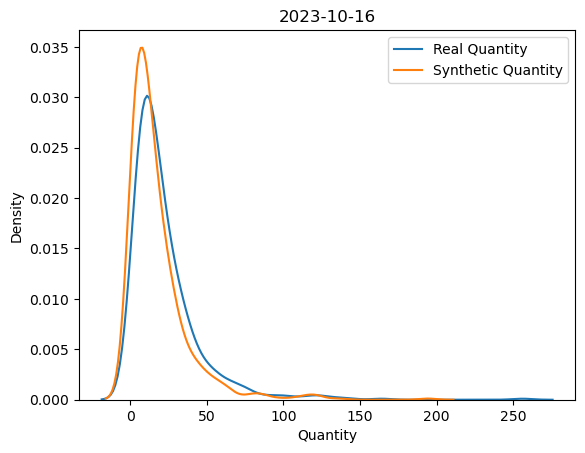

In [11]:
merged_df['Quantity'] = merged_df['Quantity'].astype(float)

sns.kdeplot(data=merged_df, x='Quantity', label='Real Quantity')
sns.kdeplot(data=merged_df, x='Quantity_Synthetic', label='Synthetic Quantity')
plt.legend()
plt.title(f'{specific_week}')
plt.show()
